# Time series 
## an analysis to extract meaningful characteristics of data and generate other useful insights applied in business situation. 

### we use Facebook Prophet that uses this regression model y(t)
### y(t)=g(t)+s(t)+h(t)+ϵ
>### Trend _g(t)_ models non-periodic changes
>### Seasonality _s(t)_ represents periodic changes.
>### Holidays component _h(t)_ contributes information about holidays and events

https://www.kaggle.com/kashnitsky/topic-9-part-2-time-series-with-facebook-prophet

https://towardsdatascience.com/a-quick-start-of-time-series-forecasting-with-a-practical-example-using-fb-prophet-31c4447a2274

# Data Exploration
## 1. importing packages

In [2]:
import numpy as np #powerful package for N-dimensional array object and
# used in linear algebra, Fourier transform, and random number capabilities

import pandas as pd #fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
from pandas import datetime


import matplotlib.pyplot as plt #plotting tool interface 
plt.style.use('fivethirtyeight') #plotting style to give the graphs a graphs a good look eg classic, 538, seaborn-whitegrid

import seaborn as sns#library for making statistical graphics
#Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
#Automatic estimation and plotting of linear regression models for different kinds dependent variables

from statsmodels.distributions.empirical_distribution import ECDF


from fbprophet import Prophet # library published by Facebook that is based on decomposable 
#trend+seasonality+holidays) models. It provides us with the ability to make time series predictions with 
#good accuracy using simple 
#intuitive parameters and has support for including impact of custom seasonality and holidays

/home/gmunge/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



## 2. Load Data
### ways of loading data
>* ### read_csv;  csv (comma separated value) we use comma as the delimiter
>* ### read_excel;  for excel sheets
>* ### read_table; files use tab '\t' as the default delimiter
>* ### read_fwf; fixed width column format

In [3]:
df =pd.read_csv('train.csv')

## 3. convert variable Month to date time datatype

In [4]:
df['Month']= pd.DatetimeIndex(df['Month'])

### fb prophet also imposes the strict condition that the input columns renamed to
> ### ds (the time column)
> ### y (the metric column)

In [5]:
df = df.rename(columns={'Month': 'ds',
                        'Sales': 'y'})



### we either have;
>### univariate plots to understand each attribute 
>
>### Multivariate plots to understand relationship between the attributes

# 4. visualization of the data

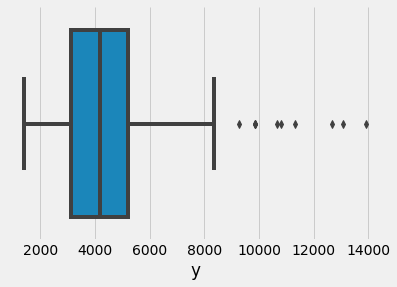

In [6]:
import seaborn as sns
sns.boxplot(df['y'])
sns.despine()

### from the box plot we see 
>### outliers
>### median at 4000; 50th percentile 
>### minimum and the maximum

### we plot a multivariate graph to relate sales versus time

### plot also a histogram

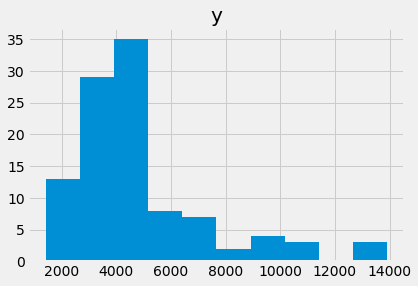

In [7]:
df.hist()
plt.show()

### we see that a retained value of 4000 of that company is what is occurin most

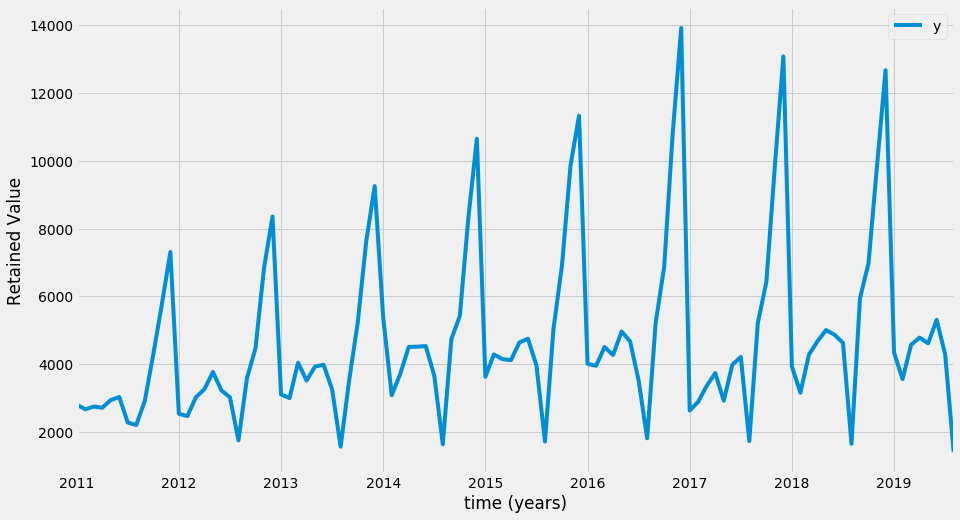

In [8]:
ax = df.set_index('ds').plot(figsize=(14, 8))
ax.set_ylabel('Retained Value' )
ax.set_xlabel('time (years)')
plt.show()

### we have seen from the box plot outliers but its not justifiable to remove them since they are not erroneous
~~~https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

# 5. Train the model

### we instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter ours is 0.95

In [9]:
my_model = Prophet(interval_width=0.95)

### now instatiate the prophets fit method into the model

In [10]:
my_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### we create a new data frame for storing dates for the future predictions
### using prophets function for creating future data frame

In [65]:
future_dates=my_model.make_future_dataframe(periods=24, freq='MS'
                                           )
future_dates.tail()

,ds
123,2021-04-01
124,2021-05-01
125,2021-06-01
126,2021-07-01
127,2021-08-01


## 5.1 we now make the prediction
>### we are working with monthly data, we clearly specified the desired frequency of the timestamps. Therefore, the _make_future_dataframe_ generated 24 monthly timestamps for us. In other words, we are looking to predict future values of our time series 2 years into the future

>###  ds: the datestamp of the forecasted value
>###   yhat: the forecasted value of our metric 
(in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
>### yhat_lower: the lower bound of our forecasts
>###    yhat_upper: the upper bound of our forecasts


In [68]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
123,2021-04-01,5210.724710,3828.187410,6558.965703
124,2021-05-01,5421.442233,3917.322834,6833.661454
125,2021-06-01,5493.028238,3955.071853,7023.913852
126,2021-07-01,4904.215781,3420.723136,6300.017315
127,2021-08-01,2971.215500,1578.772904,4533.074224


### A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

In [69]:
prediction_size = 30 #we defien the prediction sizeholder
train_df = df[:-prediction_size]
train_df.tail(n=3)

,ds,y
71,2016-12-01,13916
72,2017-01-01,2639
73,2017-02-01,2899


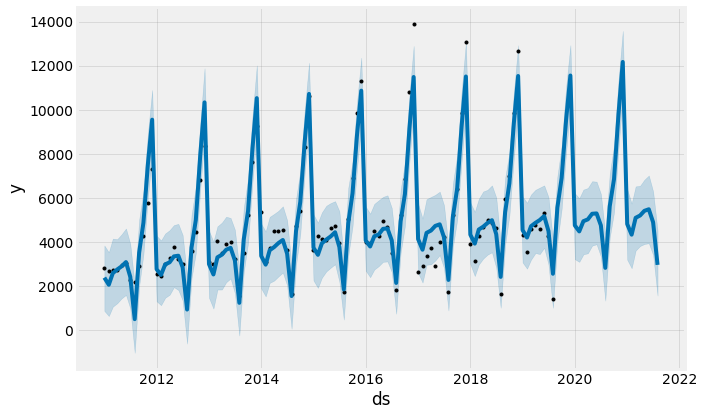

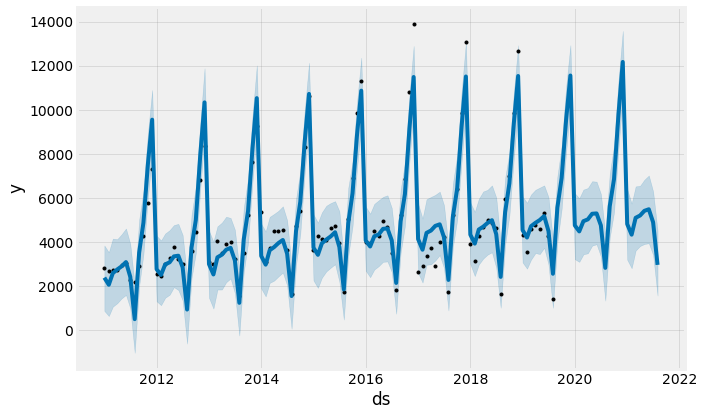

In [70]:
my_model.plot(forecast,uncertainty=True)

### Prophet plots the observed values of our time series (the black dots) 
### the forecasted values (blue line) 
### the uncertainty intervals of our forecasts (the blue shaded regions).

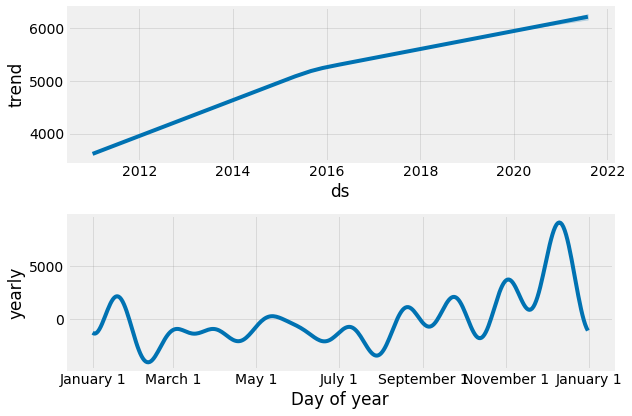

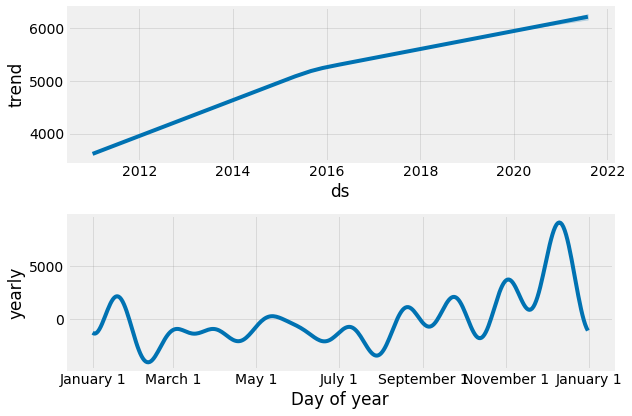

In [71]:
my_model.plot_components(forecast, uncertainty=True)

### we can see through the months the different performance of the company 
### facebook prophet uses its seasonality and holidays' feature to make the predictions

### you can use different datasets to test the facebooks inbuilt features for forecast

# 6. Testing forecasts validity
### we look for the error metrics for our forecast

 ### looking at the object the prophet created 

In [85]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


### merge with y value from initial table with that of the forecast

In [86]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))


### we guage the quality of our forecast

In [87]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.head(n=3)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2011-01-01,2393.093838,885.402803,3849.520143,2815.0
2011-02-01,2069.331085,651.817575,3539.664243,2672.0
2011-03-01,2594.890914,1077.554142,4160.564917,2755.0


### we define a helper function that we will use to gauge the quality of our forecasting with MAPE and MAE error measures:

In [88]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 17.058879054898068
MAE 351.55779740778206


### we use the inverse of this function in order to be able to restore the original data scale

In [109]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

### we prepare te dataset by setting the index

In [110]:
train_df2 = train_df.copy().set_index('ds') 

### we use scipy's Stats function
### and were looking for two values:
>### the transformed series 
>### the found value of lambda that is optimal in terms of the maximum log-likelihood

In [111]:
from scipy import stats
train_df2['y'], lambda_prophet = stats.boxcox(train_df2['y'])
train_df2.reset_index(inplace=True)

### we fit the model again

In [112]:
m2 = Prophet()
m2.fit(train_df2)
future2 = m2.make_future_dataframe(periods=prediction_size)
forecast2 = m2.predict(future2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [113]:
for column in ['yhat', 'yhat_lower', 'yhat_upper']:
    forecast2[column] = inverse_boxcox(forecast2[column], lambda_prophet)

### we make a comparison once more

In [114]:
cmp_df2 = make_comparison_dataframe(df, forecast2)
for err_name, err_value in calculate_forecast_errors(cmp_df2, prediction_size).items():
    print(err_name, err_value)

MAPE 19.822153469767525
MAE 668.0065719311656


### we need not to compute the BOX COX since our variance isn't that big and the MAE(mean absolute error) and the MAPE(mean absolute percentage error) increased 